In [419]:
#loading default python modules
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')

In [420]:
os.chdir("C:\\Users\\kiran\\Desktop\\python practice\\Project-1")

In [421]:
#loading the training data set
cab_df=pd.read_csv("train_cab.csv", parse_dates=["pickup_datetime"])
cab_df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


### check for datatypes of features and non-null entries

In [422]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [423]:
print(cab_df.isnull().sum())

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


### converting datatype of fare to float
An unknown fare amount "430-" was detected while converting, so dropped it first.

In [424]:
cab_df.drop(cab_df[(cab_df.fare_amount=='430-')].index, inplace=True)
cab_df["fare_amount"] = pd.to_numeric(cab_df["fare_amount"])

### while inspecting with the describe( ) method the following issues were found
-  minimum fare_amount was negative
-  maximum of pickup_latitude was found to be 401.08, instead of being in range from -90 to +90
-  maxium passenger_count of 5345 does not seem to be realistic for a cab with holds at max 6-7 people.

In [425]:
cab_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,15.015004,-72.462693,39.914672,-72.462233,39.897851,2.625171
std,430.460945,10.578707,6.826797,10.575384,6.187276,60.846021
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734924,-73.991182,40.734647,1.000000
50%,8.500000,-73.981700,40.752603,-73.980174,40.753566,1.000000
75%,12.500000,-73.966837,40.767377,-73.963642,40.768010,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


# Cleaning data

## Inspecting latitude and longitude of pickup and dropoff points
-  intersection of latitude and longitude of zero is somewhere in Atlantic Ocean, so we drop it from dataset
-  same pickup and dropoff coordinates suggest some sort of cancellation fee was charged

In [426]:
cab_df[(cab_df.pickup_longitude==cab_df.dropoff_longitude) & (cab_df.pickup_latitude==cab_df.dropoff_latitude)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.50,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3.0
15,5.00,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
26,NaN,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
105,52.00,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1.0
124,8.00,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2.0
191,6.50,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1.0
192,3.70,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0
233,8.50,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,236.0
270,7.50,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1.0
273,8.10,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4.0


### dropping the irrelevant coordinates
- below 156 records shows the fare amount charged from the customers as a cancellation fee

In [427]:
mask = cab_df['pickup_longitude']!=0 
mask &= cab_df['dropoff_longitude']!=0
mask &= cab_df['pickup_latitude']!=0
mask &= cab_df['dropoff_latitude']!=0
mask &= cab_df['fare_amount']>0
mask &= cab_df['pickup_longitude'].between(-180, +180)
mask &= cab_df['dropoff_longitude'].between(-180, +180)
mask &= cab_df['pickup_latitude'].between(-90, 90)
mask &= cab_df['dropoff_latitude'].between(-90, 90)
cab_df = cab_df[mask]
cab_df[(cab_df.pickup_longitude==cab_df.dropoff_longitude) & (cab_df.pickup_latitude==cab_df.dropoff_latitude)].sort_values(by='fare_amount')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
13571,2.50,2009-03-09 12:26:25 UTC,-73.416169,40.784140,-73.416169,40.784140,1.0
1774,2.50,2012-08-27 15:24:00 UTC,-73.950282,40.701282,-73.950282,40.701282,1.0
1419,2.50,2013-07-21 00:10:23 UTC,-73.956556,40.779828,-73.956556,40.779828,1.0
8711,2.50,2013-01-02 09:33:21 UTC,-73.978626,40.744067,-73.978626,40.744067,1.0
4367,2.50,2014-01-13 16:14:48 UTC,-73.948410,40.744969,-73.948410,40.744969,1.0
7408,2.50,2011-01-18 16:07:22 UTC,-73.960443,40.761375,-73.960443,40.761375,1.0
9177,2.50,2010-12-06 11:48:34 UTC,-73.946993,40.744583,-73.946993,40.744583,3.0
9773,2.50,2013-03-29 18:45:53 UTC,-73.874439,40.773819,-73.874439,40.773819,1.0
657,2.50,2009-08-25 01:50:21 UTC,-73.986410,40.763350,-73.986410,40.763350,1.0
503,2.50,2010-01-19 01:10:00 UTC,-73.998720,40.624708,-73.998720,40.624708,1.0


### dropping all records with a cancellation fee of more than $50

In [428]:
cab_df.drop(cab_df[(cab_df.fare_amount>50) & (cab_df.pickup_longitude==cab_df.dropoff_longitude) & (cab_df.pickup_latitude==cab_df.dropoff_latitude)].index, inplace=True)

In [429]:
cab_df.shape

(15704, 7)

In [430]:
# dropping missing values and taking upto a maximum of six passengers into consideration
cab_df.dropna(how='any', axis='rows', inplace=True)
mask &= cab_df['passenger_count'].between(0,6)
cab_df = cab_df[mask]
print(cab_df.shape)
cab_df.describe()


(15632, 7)


C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15632.000000,15632.000000,15632.000000,15632.000000,15632.000000,15632.000000
mean,15.076475,-73.911343,40.689596,-73.906143,40.687543,1.644730
std,436.062332,2.661509,2.615726,2.713342,2.634838,1.267649
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000
25%,6.000000,-73.992371,40.736543,-73.991364,40.736296,1.000000
50%,8.500000,-73.982044,40.753299,-73.980552,40.754230,1.000000
75%,12.500000,-73.968073,40.767802,-73.965359,40.768313,2.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000


###  inspecting the spread of fare_amount with histogram and box plot

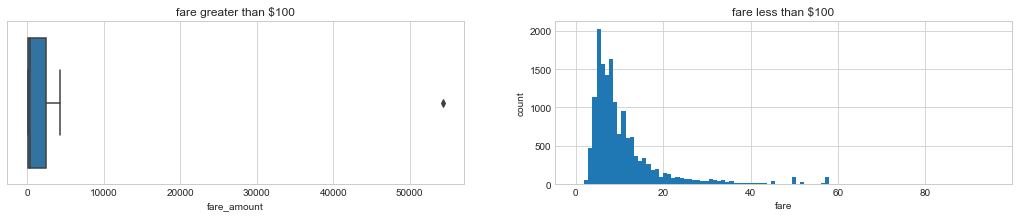

In [431]:
fig = plt.figure()

plt.subplot(1, 2, 1)
sns.boxplot(x=cab_df[(cab_df.fare_amount>100)].fare_amount)
plt.title("fare greater than $100")

plt.subplot(1, 2, 2)
cab_df[cab_df.fare_amount<100].fare_amount.hist(bins=100, figsize=(18,3))
plt.xlabel('fare')
plt.ylabel('count')
plt.title('fare less than $100');

### dropping all outliers with fare amount >200

In [432]:
cab_df[cab_df.fare_amount>200].count()

fare_amount          4
pickup_datetime      4
pickup_longitude     4
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
passenger_count      4
dtype: int64

In [433]:
mask &= cab_df['fare_amount']<200
cab_df = cab_df[mask]

C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [434]:
cab_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,11.268393,-73.911321,40.689582,-73.906123,40.687527,1.644831
std,9.438506,2.661849,2.616061,2.713689,2.635175,1.267777
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000
25%,6.000000,-73.992369,40.736548,-73.991364,40.736296,1.000000
50%,8.500000,-73.982042,40.753300,-73.980552,40.754230,1.000000
75%,12.500000,-73.968064,40.767802,-73.965365,40.768313,2.000000
max,165.000000,40.766125,41.366138,40.802437,41.366138,6.000000


### import geopy library to calculate distance between the source and destination coordinates

In [435]:
import geopy.distance
def total_distance(row):
    pickup_latitude=row['pickup_latitude']
    pickup_longitude=row['pickup_longitude']
    dropoff_latitude=row['dropoff_latitude']
    dropoff_longitude=row['dropoff_longitude']
    coords_1 = (pickup_latitude,pickup_longitude)
    coords_2 = (dropoff_latitude,dropoff_longitude)

    return geopy.distance.geodesic(coords_1, coords_2).km

cab_df['total_distance']=cab_df.apply(total_distance,axis=1)


In [436]:
cab_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,11.268393,-73.911321,40.689582,-73.906123,40.687527,1.644831,4.040394
std,9.438506,2.661849,2.616061,2.713689,2.635175,1.267777,56.229738
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000,0.000000
25%,6.000000,-73.992369,40.736548,-73.991364,40.736296,1.000000,1.258495
50%,8.500000,-73.982042,40.753300,-73.980552,40.754230,1.000000,2.173438
75%,12.500000,-73.968064,40.767802,-73.965365,40.768313,2.000000,3.901180
max,165.000000,40.766125,41.366138,40.802437,41.366138,6.000000,5434.774894


In [437]:
cab_df[cab_df.fare_amount==165]
cab_df.drop(cab_df[(cab_df.fare_amount==165)].index, inplace=True)

### converting datatype of pickup_datetime column to datetime

In [438]:
cab_df['pickup_datetime'] = cab_df['pickup_datetime'].str.slice(0, 16)
cab_df['pickup_datetime'] = pd.to_datetime(cab_df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M', errors='coerce')
cab_df[cab_df.pickup_datetime.isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance
1327,11.5,NaT,-73.981947,40.7282,-73.988582,40.759202,1.0,3.488051


In [439]:
#removing the NaT entry from the dataset
mask &= cab_df.pickup_datetime.notnull()
cab_df = cab_df[mask]

C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### extracting hour, day and year from pickup_datetime column
- hour in range (0, 23)
- day in range (0, 6) where {0: monday, 6: sunday}
- year in range (2009, 2015)

In [440]:
def transform(data):
    # Extract date attributes and then drop the pickup_datetime column
    data['hour'] = data['pickup_datetime'].dt.hour
    data['day'] = data['pickup_datetime'].dt.weekday
    data['month'] = data['pickup_datetime'].dt.month
    data['year'] = data['pickup_datetime'].dt.year
    data = data.drop('pickup_datetime', axis=1)
    #data= data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
    return data
cab_data = transform(cab_df)  

In [441]:
cab_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance,hour,day,month,year
count,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000,15626.000000
mean,11.258540,-73.911335,40.689558,-73.906136,40.687500,1.644914,4.040686,13.503712,3.033342,6.265455,2011.733713
std,9.358641,2.662018,2.616226,2.713862,2.635342,1.267837,56.233327,6.505561,1.969424,3.447127,1.865956
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,0.000000,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992370,40.736548,-73.991367,40.736295,1.000000,1.258530,9.000000,1.000000,3.000000,2010.000000
50%,8.500000,-73.982044,40.753300,-73.980552,40.754227,1.000000,2.173438,14.000000,3.000000,6.000000,2012.000000
75%,12.500000,-73.968067,40.767802,-73.965368,40.768311,2.000000,3.901959,19.000000,5.000000,9.000000,2013.000000
max,108.000000,40.766125,41.366138,40.802437,41.366138,6.000000,5434.774894,23.000000,6.000000,12.000000,2015.000000


### Inspecting total_distance for an outliers

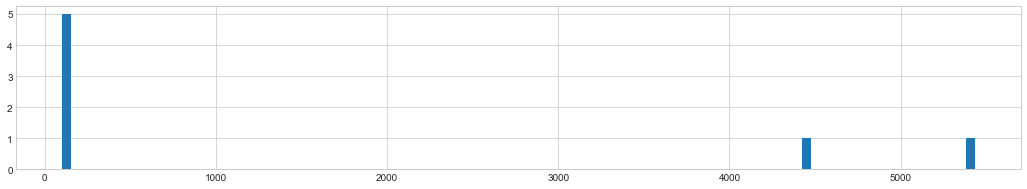

In [442]:
cab_data[cab_data.total_distance>100].total_distance.hist(bins=100, figsize=(18,3))

In [445]:
# dropping rows with distance > 3000km
cab_data.drop(cab_data[(cab_data.total_distance>3000)].index, inplace=True)
cab_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance,hour,day,month,year
count,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000,15417.000000
mean,11.273294,-73.917993,40.696184,-73.917003,40.696695,1.644446,3.453867,13.512551,3.035286,6.263800,2011.736006
std,9.268402,2.515881,2.466573,2.516001,2.466199,1.266920,4.599614,6.504678,1.970870,3.446493,1.866516
min,1.140000,-74.438233,-74.006893,-74.227047,-73.994392,0.000000,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992375,40.736524,-73.991369,40.736285,1.000000,1.288861,9.000000,1.000000,3.000000,2010.000000
50%,8.500000,-73.982057,40.753293,-73.980548,40.754223,1.000000,2.201822,14.000000,3.000000,6.000000,2012.000000
75%,12.500000,-73.968109,40.767802,-73.965395,40.768337,2.000000,3.945989,19.000000,5.000000,9.000000,2013.000000
max,108.000000,40.766125,41.366138,40.802437,41.366138,6.000000,129.767395,23.000000,6.000000,12.000000,2015.000000


In [444]:
#dropping records with distances greater than 0m and less than 300m.
cab_data.loc[(cab_data.total_distance<0.3) & (cab_data.total_distance)!=0].sort_values(by='total_distance')
cab_data.drop(cab_data[(cab_data.total_distance<0.3) & (cab_data.total_distance)!=0].index, inplace=True)

### Inspecting how different features affect the Fare amount

In [446]:
cab_data.passenger_count.unique()

array([1.  , 2.  , 3.  , 6.  , 5.  , 4.  , 0.  , 1.3 , 0.12])

In [447]:
#dropping false passenger counts
cab_data.drop(cab_data[(cab_data.passenger_count==1.3) | (cab_data.passenger_count==0.12)].index, inplace=True) 

#### looks like single passengers are the most frequent travellers, and the highest fare also come from cabs which carry just 1 passenger.

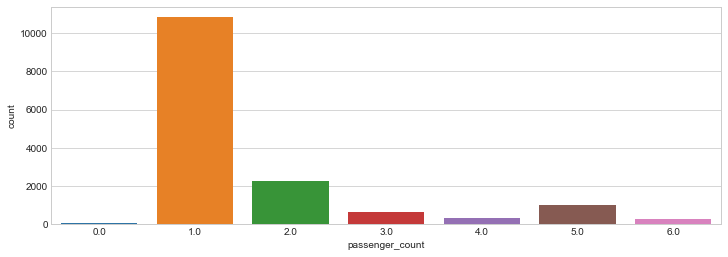

In [448]:
plt.figure(figsize = (12,4))
sns.countplot(x="passenger_count",data=cab_data,saturation=.8)

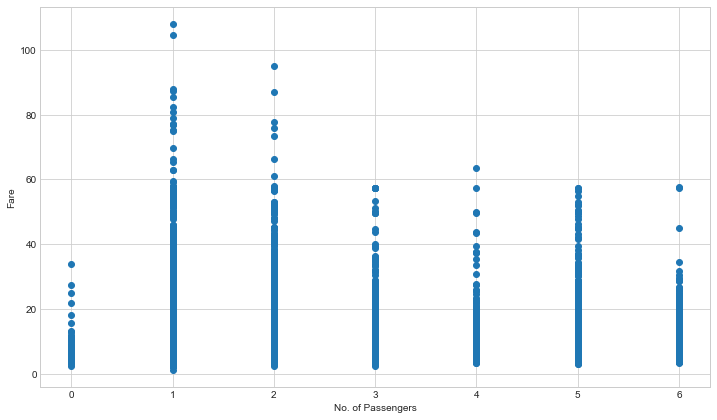

In [449]:
plt.figure(figsize=(12,7))
plt.scatter(x=cab_data['passenger_count'], y=cab_data['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare');

####  The frequency of cab rides seem to be the lowest at 5AM and the highest at 6PM.

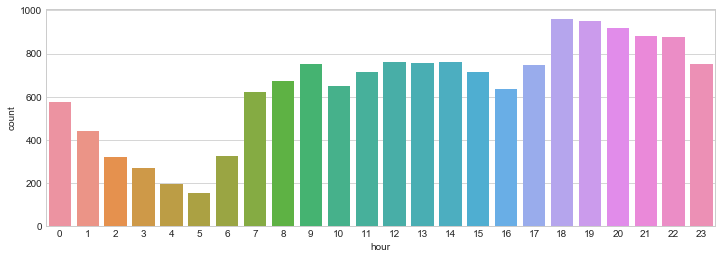

In [450]:
plt.figure(figsize = (12,4))
sns.countplot(x="hour",data=cab_data,saturation=.8)

#### fare however, seem to be high betweeb 4-5AM and 2-4PM. 
- mostly people leave for work early to avoid traffic,and frequency of cabs available in early morning is less.
- cab fares are also high during rush hours/ traffic.

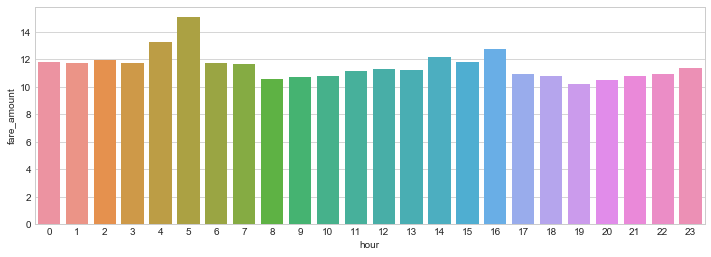

In [451]:
plt.figure(figsize = (12,4))
sns.barplot(x="hour",y='fare_amount',data=cab_data,saturation=.8,ci=None)

#### looks like the total fare_amount  is more in friday and saturday as people love to travel or go home during weekends

In [452]:
cab_data.groupby(['day']).sum()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance,hour,month,year
day,,,,,,,,,,
0,23583.69,-151050.657982,83215.629826,-151052.749168,83214.543555,3254.0,7228.440436,28482,13024,4108090
1,24616.17,-162148.754261,89330.708454,-162151.129444,89327.801640,3450.0,7367.441844,30845,13738,4409714
2,24403.91,-163805.614855,90084.618953,-163805.283101,90085.565740,3615.0,7339.147575,31015,14114,4463945
3,25023.70,-164405.462205,90517.064226,-164402.417407,90517.109032,3493.0,7550.571254,30957,14025,4475938
4,26012.49,-168878.129971,92924.696804,-168874.175172,92928.215643,3875.0,7819.028077,30823,13834,4598636
5,26017.71,-174769.488348,96216.841564,-174763.475818,96219.700218,4010.0,8039.673110,31116,14718,4756027
6,24118.20,-154387.622126,85042.065248,-154381.192502,85046.582666,3654.0,7895.956340,25074,13110,4198557


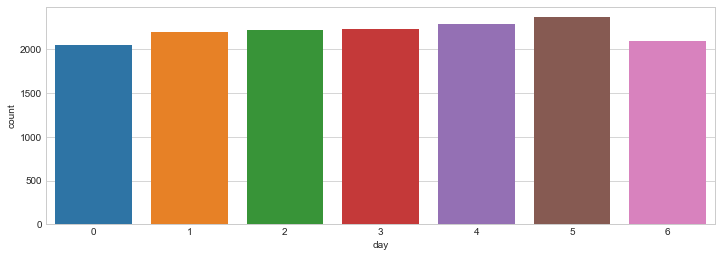

In [453]:
plt.figure(figsize = (12,4))
sns.countplot(x="day",data=cab_data,saturation=.8)

### Heatmap to visualize correlation between different features
- total distance is highly correlated with fare_amount

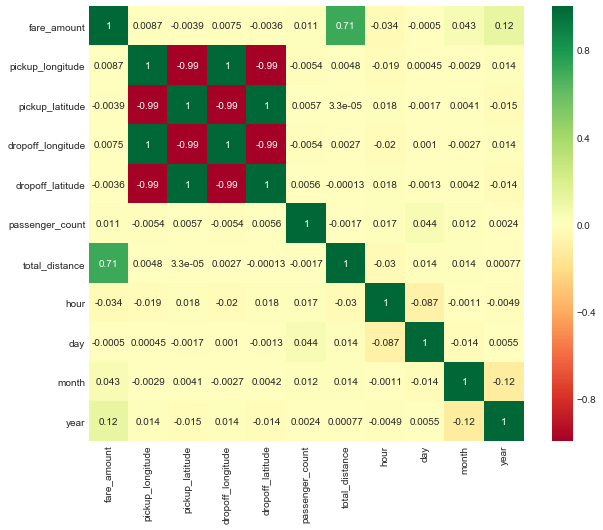

In [454]:
import seaborn as sns 
plt.figure(figsize = (10,8))
sns.heatmap(cab_data.corr(),square=True,cmap='RdYlGn',annot=True)

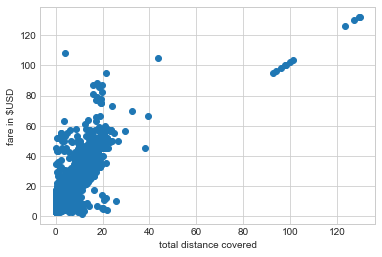

In [460]:
plt.scatter(cab_data.total_distance,cab_data.fare_amount)
plt.xlabel("total distance covered")
plt.ylabel("fare in $USD");

In [456]:
print("Average $USD/km : {:0.2f}".format(cab_data.fare_amount.between(0,200).sum()/cab_data.total_distance.between(0,80).sum()))

Average $USD/km : 1.00


In [457]:
over80=cab_data.loc[(cab_data['total_distance']>80)]
over80

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance,hour,day,month,year
1684,2.50,-73.137393,41.366138,-73.996510,40.745320,2.0,99.845254,19,5,5,2009
3075,6.90,-73.137393,41.366138,-73.974598,40.751311,1.0,98.054446,10,1,1,2009
4487,4.90,-73.137393,41.366138,-73.957685,40.765644,1.0,95.920526,7,2,8,2009
5663,49.15,-73.137393,41.366138,-74.000940,40.731723,1.0,101.166020,7,2,2,2009
7401,4.50,-73.900571,40.764047,-73.137393,41.366138,1.0,92.658762,9,3,7,2009
9808,6.90,-73.137393,41.366138,-73.952331,40.786380,1.0,93.997921,23,3,8,2009
9899,7.70,-73.974361,40.755168,-73.137393,41.366138,1.0,97.740864,19,2,8,2009
10710,3.70,-73.955411,39.604164,-73.955647,40.772837,1.0,129.767395,21,4,2,2011
11619,11.30,-73.945106,39.603178,-73.976636,40.749643,1.0,127.329567,21,4,5,2011
12228,16.50,-73.993360,40.721749,-73.977370,39.610604,2.0,123.386652,23,1,4,2011


#### imputing fare_amount with a  $USD/km = 1 for distance > 80 km with base fare of 2.5

In [458]:
over80['fare_amount'] = over80.apply(
    lambda row: ((row['total_distance'] * 1) + 2.50), axis=1)

C:\Users\kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [459]:
cab_data.update(over80)

## Training data

In [461]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [462]:
X=cab_data.drop('fare_amount',axis=1).values
y=cab_data['fare_amount'].values

In [463]:
steps = [('scaler', StandardScaler()),
        ('linreg', LinearRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Fit the pipeline to the training set
reg_scaled = pipeline.fit(X_train,y_train)

y_pred = reg_scaled.predict(X_test)


In [465]:
print("R^2: {}".format(reg_scaled.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7034689167337377
Root Mean Squared Error: 5.5353143429534235


In [466]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [800,900,1000],
               'max_features': ['sqrt','auto'],
               'max_depth': [5,6,7,8,9,10],
               'min_samples_leaf':[5,10,50,100,200,500],
              'oob_score':['True']}
               
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter=10 ,cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
bestmodel=rf_random.best_estimator_
rf_pred= bestmodel.predict(X_test)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
print("RMSE for Random Forest is ",rf_rmse)
print(rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.4min finished


RMSE for Random Forest is  3.699403199348677
{'oob_score': 'True', 'n_estimators': 800, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10}


In [467]:
print("R^2: {}".format(rf_random.score(X_test, y_test)))

R^2: 0.8675509090422489


In [469]:
# Train a new model with the xgboost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
params = {'eval_metric': 'rmse',
              'max_depth': 10,
              'subsample': 0.8,
              'eta': 0.05,
              'gamma': 0.2,
              'colsample_bytree': 0.8
         }
xg_model = xgb.train(params, dtrain, num_boost_round=800)
 
# Predict on testing and training set
y_pred = xg_model.predict(dtest)
y_train_pred = xg_model.predict(dtrain)

# Report testing and training RMSE
xg_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for xgboost is: ",xg_rmse)


RMSE for xgboost is:  3.3908691228866727


In [470]:
cab_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance,hour,day,month,year
count,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000,15415.000000
mean,11.344435,-73.917984,40.696181,-73.916991,40.696693,1.644567,3.453796,13.513591,3.035420,6.264223,2011.735777
std,9.643331,2.516044,2.466733,2.516164,2.466359,1.266940,4.599892,6.504437,1.970831,3.446441,1.866521
min,1.140000,-74.438233,-74.006893,-74.227047,-73.994392,0.000000,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992375,40.736525,-73.991366,40.736289,1.000000,1.288742,9.000000,1.000000,3.000000,2010.000000
50%,8.500000,-73.982057,40.753295,-73.980545,40.754230,1.000000,2.201708,14.000000,3.000000,6.000000,2012.000000
75%,12.500000,-73.968108,40.767803,-73.965392,40.768338,2.000000,3.945049,19.000000,5.000000,9.000000,2013.000000
max,132.267395,40.766125,41.366138,40.802437,41.366138,6.000000,129.767395,23.000000,6.000000,12.000000,2015.000000


## Testing data

In [471]:
cab_test=pd.read_csv("test.csv")
cab_test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [472]:
cab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [473]:
print(cab_test.isnull().sum())

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [474]:
mask = cab_test['pickup_longitude']!=0 
mask &= cab_test['dropoff_longitude']!=0
mask &= cab_test['pickup_latitude']!=0
mask &= cab_test['dropoff_latitude']!=0
mask &= cab_test['pickup_longitude'].between(-180, +180)
mask &= cab_test['dropoff_longitude'].between(-180, +180)
mask &= cab_test['pickup_latitude'].between(-90, 90)
mask &= cab_test['dropoff_latitude'].between(-90, 90)
cab_test = cab_test[mask]


In [475]:
import geopy.distance
def total_distance(row):
    pickup_latitude=row['pickup_latitude']
    pickup_longitude=row['pickup_longitude']
    dropoff_latitude=row['dropoff_latitude']
    dropoff_longitude=row['dropoff_longitude']
    coords_1 = (pickup_latitude,pickup_longitude)
    coords_2 = (dropoff_latitude,dropoff_longitude)

    return geopy.distance.geodesic(coords_1, coords_2).km

cab_test['total_distance']=cab_test.apply(total_distance,axis=1)


In [476]:
cab_test['pickup_datetime'] = cab_test['pickup_datetime'].str.slice(0, 16)
cab_test['pickup_datetime'] = pd.to_datetime(cab_test['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M', errors='coerce')
cab_test[cab_test.pickup_datetime.isnull()]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance


In [477]:
def transform(data):
    # Extract date attributes and then drop the pickup_datetime column
    data['hour'] = data['pickup_datetime'].dt.hour
    data['day'] = data['pickup_datetime'].dt.weekday
    data['month'] = data['pickup_datetime'].dt.month
    data['year'] = data['pickup_datetime'].dt.year
    data = data.drop('pickup_datetime', axis=1)
    #data= data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
    return data
cab_test = transform(cab_test)  

In [478]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,total_distance,hour,day,month,year
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,3.436325,13.467420,2.852834,6.857979,2011.815816
std,0.042774,0.033541,0.039072,0.035435,1.278747,3.975529,6.868584,1.994451,3.353272,1.803347
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,1.299267,8.000000,1.000000,4.000000,2010.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2.218088,15.000000,3.000000,7.000000,2012.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,4.045367,19.000000,5.000000,10.000000,2014.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,100.063275,23.000000,6.000000,12.000000,2015.000000


In [479]:
result = bestmodel.predict(cab_test)

In [480]:
#saving results to result.csv
final_result=pd.DataFrame(result)
final_result.columns=['fare_price']
os.chdir("C:\\Users\\kiran\\Desktop\\python practice\\Project-1")
final_df=pd.concat([cab_test,final_result],axis=1,join_axes=[cab_test.index])
final_df.to_csv("result.csv",index=False)
